In [1]:
import numpy as np
import matplotlib.pyplot as plt
# recognize this file about drive
from google.colab import drive 

In [2]:
#give this file access to your drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
#to show all files and folders in list in mentioned path
# /content/drive/ is used as prefix in path.
!ls "/content/drive/My Drive/Deep_Learning_Code/"

 Digits			   Image_Classification.ipynb
'Fully Connected_NN.PNG'   MNIST_Classification.ipynb


In [7]:
#The OS module in Python provides functions for creating, modifying, adding and removing a directory (folder).
#TensorFlow is a free and open-source software library for machine learning and artificial intelligence.
#keras is used to make the implementation of neural networks easy.

import os
from tensorflow.keras.utils import to_categorical

In [8]:
images = []
labels = []

In [24]:
path="/content/drive/My Drive/Deep_Learning_Code/Digits/"
#getting all the folders of Digits in list
foldersInDigits = os.listdir(path)
print("Name of all those folders which are in Digits folder : ", foldersInDigits)

Name of all those folders which are in Digits folder :  ['4', '6', '8', '7', '3', '5', '9', '1', '0', '2']


In [26]:

filesInDigit0 = os.listdir(path+"0/")
filesInDigit0

['img_322.jpg',
 'img_260.jpg',
 'img_5.jpg',
 'img_183.jpg',
 'img_114.jpg',
 'img_404.jpg',
 'img_502.jpg',
 'img_373.jpg',
 'img_146.jpg',
 'img_286.jpg',
 'img_110.jpg',
 'img_54.jpg',
 'img_248.jpg',
 'img_279.jpg',
 'img_153.jpg',
 'img_200.jpg',
 'img_418.jpg',
 'img_375.jpg',
 'img_157.jpg',
 'img_23.jpg',
 'img_1.jpg',
 'img_251.jpg',
 'img_292.jpg',
 'img_201.jpg',
 'img_327.jpg',
 'img_435.jpg',
 'img_267.jpg',
 'img_433.jpg',
 'img_273.jpg',
 'img_542.jpg',
 'img_98.jpg',
 'img_403.jpg',
 'img_111.jpg',
 'img_204.jpg',
 'img_141.jpg',
 'img_486.jpg',
 'img_508.jpg',
 'img_272.jpg',
 'img_196.jpg',
 'img_285.jpg',
 'img_264.jpg',
 'img_276.jpg',
 'img_195.jpg',
 'img_203.jpg',
 'img_366.jpg',
 'img_344.jpg',
 'img_188.jpg',
 'img_17.jpg',
 'img_149.jpg',
 'img_357.jpg',
 'img_129.jpg',
 'img_4.jpg',
 'img_108.jpg',
 'img_538.jpg',
 'img_472.jpg',
 'img_412.jpg',
 'img_288.jpg',
 'img_63.jpg',
 'img_193.jpg',
 'img_69.jpg']

In [31]:
#iterating all the files that exist in digits (0,1,2,3,4,5,6,7,8,9)
for folder in foldersInDigits:
  #iterarting each of the folder of Digits (inside 0, inside 1,inside 2,....)
  fileNames = os.listdir(path + folder + "/")
  for files in fileNames:
    img = plt.imread(path + folder + "/" + files)
    #making the list of all images
    images.append(img)
    #making the list of all labels
    labels.append(int(folder))


In [35]:
#there is a list of 600 images 
print(len(images))

600


In [36]:
#there is a list of 600 labels ranging from 0-9(because folder names were from 0-9)
print(len(labels))

600


In [37]:
#covert list to array
images = np.array(images)
labels = np.array(labels)


4


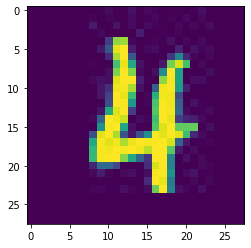

In [40]:
plt.imshow(images[0])
print(labels[0])

In [50]:
from sklearn.model_selection import train_test_split
# test_size=0.2 it means there must be 20% of total images i.e. 600 = 120 images, test images
#random_state => controls the shuffling process, random_state = 0 means get the same train and test sets across different executions. aik dfa shuffle ho janay k baad jo result aye hmesha wahi rakhna
#shuffle=True => as images shuffle, labels must be shuffled accordingly.
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.20, random_state=0, shuffle=True)

In [60]:
#there are 600 images(480 images are train images and 120 images are test image)
print(images.shape)

(600, 28, 28)


In [59]:
#There are 480 training images of 28x28 size. (480 boxes => each box has 28 rows, one col in each row has 28 coloumns)
#480 boxes => each box is of size 28 by 28 so we can predict as 2d image(gray scale image) of size 28 by 28. 
print(train_images.shape)

(480, 28, 28)


In [58]:
#train_labels is one d array containing one label against each image.
#if we have 480 train images, then there must be 480 lebels for each image.
print(train_labels.shape)

(480,)


In [49]:
#there are 120 test images of 28x28 size.
print(test_images.shape)

(120, 28, 28)


In [61]:
#if we have 120 test images, then there must be 120 lebels for each image.
print(test_labels.shape)

(120,)


In [63]:
# Find the unique numbers from the train labels
unique_labels = np.unique(train_labels)
print('unique lebels : ', unique_labels)

unique lebels :  [0 1 2 3 4 5 6 7 8 9]


In [65]:
classes_num = len(unique_labels)
print('Total number of classes : ', classes_num)

Total number of classes :  10


Text(0.5, 1.0, 'Ground Truth : 4')

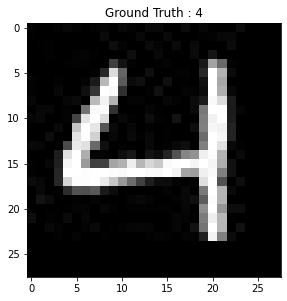

In [67]:
plt.figure(figsize=[10,5])

# Display the third image in training data
plt.subplot(121)
#there are 480 boxes, us me se third box pe jao, wahan ki sari rows aur saray coloumns get kro, mtlb third image get kro
plt.imshow(train_images[2,:,:], cmap='gray')          #plt.imshow(train_images[2], cmap='gray')  
plt.title("Ground Truth : {}".format(train_labels[2]))  #show the label of your image accordingly

Text(0.5, 1.0, 'Ground Truth : 2')

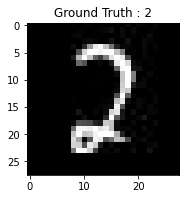

In [68]:
# Display the sixth image in testing data
plt.subplot(122)
plt.imshow(test_images[5,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[5]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
dim_data = np.prod(train_images.shape[1:])
print("dim_data:", dim_data)

In [70]:
# getting the number of pixels in one image
#np.prod returns the product of entries in image.
#train_images.shape[1:] prints (28,28) so 28*28=784
dim_data = np.prod(train_images.shape[1:])
print("dim_data:", dim_data)

dim_data: 784


In [71]:
#converting train_images(480,28,28) to (480,784) => keeping all the pixels of 2d image in one d array. => hr image k against aik row(1d array) ho gi aur us row me 784 coloumns(pixels) hon gy image k
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [73]:
print(train_data.shape)
print(test_data.shape)

(480, 784)
(120, 784)


In [77]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [78]:
# Change the labels from integer to categorical data
#categorical data converts your labels to one hot (binary vector) => since there are 10 classes so there will be ten one_hot vectors
#each hot vector is defining one class
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [80]:
# train_labels were containing 480 entries and there were 10 different entries. so its size becomes 480 by 10.
print(train_labels_one_hot.shape)
print(test_labels_one_hot.shape)

(480, 10)
(120, 10)


In [85]:
#this is hot vector dfined against images have label 6.
print(train_labels[0],train_labels_one_hot[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [86]:
#---------------Create the Network Architecure-------------------

In [87]:
#creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#building model, There are two types of models,1-sequential and recurrent(recursion) => we will use sequaential model
model = Sequential()

#adding hidden layers in model
#there are 256 neurons in layer, this layer will use relu as activation function, 
model.add(Dense(256, activation='relu'))
#this layer will include 512 neurons
model.add(Dense(512, activation='relu'))
#this is final output layer which will have neurons=number of classes=10, we will use softmax activation function because it is probability distribution function
model.add(Dense(classes_num, activation='softmax'))
type(model)
#we have compled network architecture

keras.engine.sequential.Sequential

In [89]:
#configure the network or defining some parameters for training
#An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate.
#loss defines any loss function
#there are some metrics persision, accuracy etc on which basic we evaluate the DL models.
#Metrics help in evaluating deep learning models. Metrics are used to monitor and measure the performance of model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
#train the model

#epoch => one forward pass and one backword pass make one epoch
#batch => one epoch is too big to feed to the computer so we divide it in several batches
#btach_size => total number of training examples/images in one batch
#iteratiuons => are total number of batches in one epoch

#there are 15 epochs, it means 
history = model.fit(train_data, train_labels_one_hot, batch_size=128, epochs=15, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/15
4/4 [==============================] - 1s 80ms/step - loss: 72.4681 - accuracy: 0.2479 - val_loss: 31.3647 - val_accuracy: 0.5583
Epoch 2/15
4/4 [==============================] - 0s 18ms/step - loss: 26.4352 - accuracy: 0.6167 - val_loss: 14.0257 - val_accuracy: 0.6167
Epoch 3/15
4/4 [==============================] - 0s 17ms/step - loss: 6.9781 - accuracy: 0.7563 - val_loss: 10.9684 - val_accuracy: 0.5917
Epoch 4/15
4/4 [==============================] - 0s 25ms/step - loss: 4.8479 - accuracy: 0.8042 - val_loss: 6.9976 - val_accuracy: 0.6750
Epoch 5/15
4/4 [==============================] - 0s 17ms/step - loss: 1.5621 - accuracy: 0.8958 - val_loss: 6.5894 - val_accuracy: 0.7250
Epoch 6/15
4/4 [==============================] - 0s 17ms/step - loss: 1.3883 - accuracy: 0.8958 - val_loss: 6.4588 - val_accuracy: 0.7250
Epoch 7/15
4/4 [==============================] - 0s 25ms/step - loss: 0.3056 - accuracy: 0.9667 - val_loss: 6.6326 - val_accuracy: 0.7417
Epoch 8/15
4/4 [======

In [91]:

#how much your data trained well, test it/evaluate it.
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4/4 [==============================] - 0s 4ms/step - loss: 5.1339 - accuracy: 0.8000
Evaluation result on Test Data : Loss = 5.133871555328369, accuracy = 0.800000011920929
